# Image Quality Qualitative Analysis

## Random Sampling of the Synthetic Images

## Implementation & Results

The purpose of this notebook is to implement a random sampling of the synthetic data in order to perform a qualitative image quality analysis. The results were outlined in the section 4.1.2 of the bachelor thesis.

The code provided in this notebook was developed using the Google Cloud platform.

## Step 1 - Importing Dependencies

- Importing the necessary libraries to execute the code.

In [ ]:
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import torchvision.transforms as transforms 
import random

## Step 2 - Dataset Loading

- Loading the subsets as a PyTorch dataset from the `ImageFolder` method.

In [ ]:
preprocessing = transforms.Compose([
    transforms.ToTensor(),
])

raw = ImageFolder(root='path/to/dataset', transform=preprocessing)
dcgan = ImageFolder(root='path/to/dataset', transform=preprocessing)
vae = ImageFolder(root='path/to/dataset', transform=preprocessing)
ddpm_uncond = ImageFolder(root='path/to/dataset', transform=preprocessing)
ddpm_cond = ImageFolder(root='path/to/dataset', transform=preprocessing)

## Step 3 - Sampling Functions

- Selecting the synthetic image to plot
- Creating the grid with the selected instances

In [ ]:
def select_images(dataset):
    images_by_class = {i: [] for i in range(10)}

    for image, label in dataset:
        images_by_class[label].append(image)

    images = []
    for i in range(10):
        random.shuffle(images_by_class[i])  # Shuffle the images in each class
        images += random.sample(images_by_class[i], 3)  # Select three random images

    return images

def plot_grid(images):
    grid = vutils.make_grid(images, nrow=3, scale_each=True)
    fig, ax = plt.subplots(figsize=(15, 30))
    ax.imshow(grid.permute(1, 2, 0))
    ax.axis('off')
    plt.show()

## Step 4 - Plotting the Selected Synthetic Data

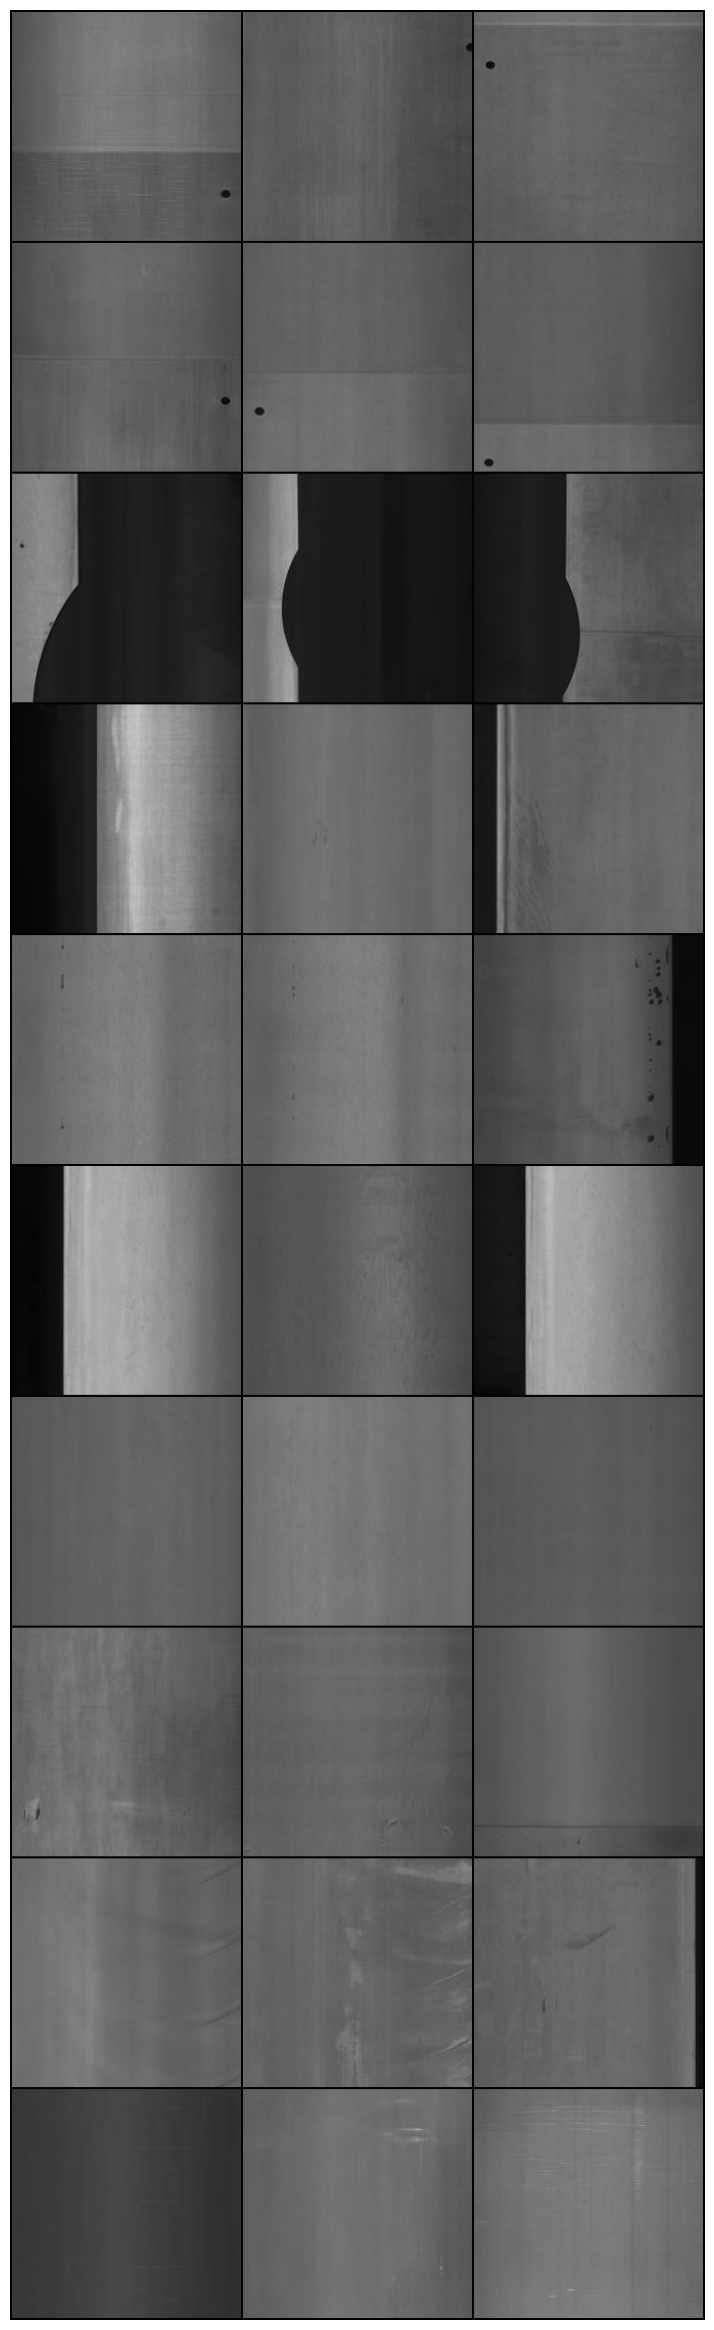

In [ ]:
# Original Images
images_raw = select_images(raw)
plot_grid(images_raw)

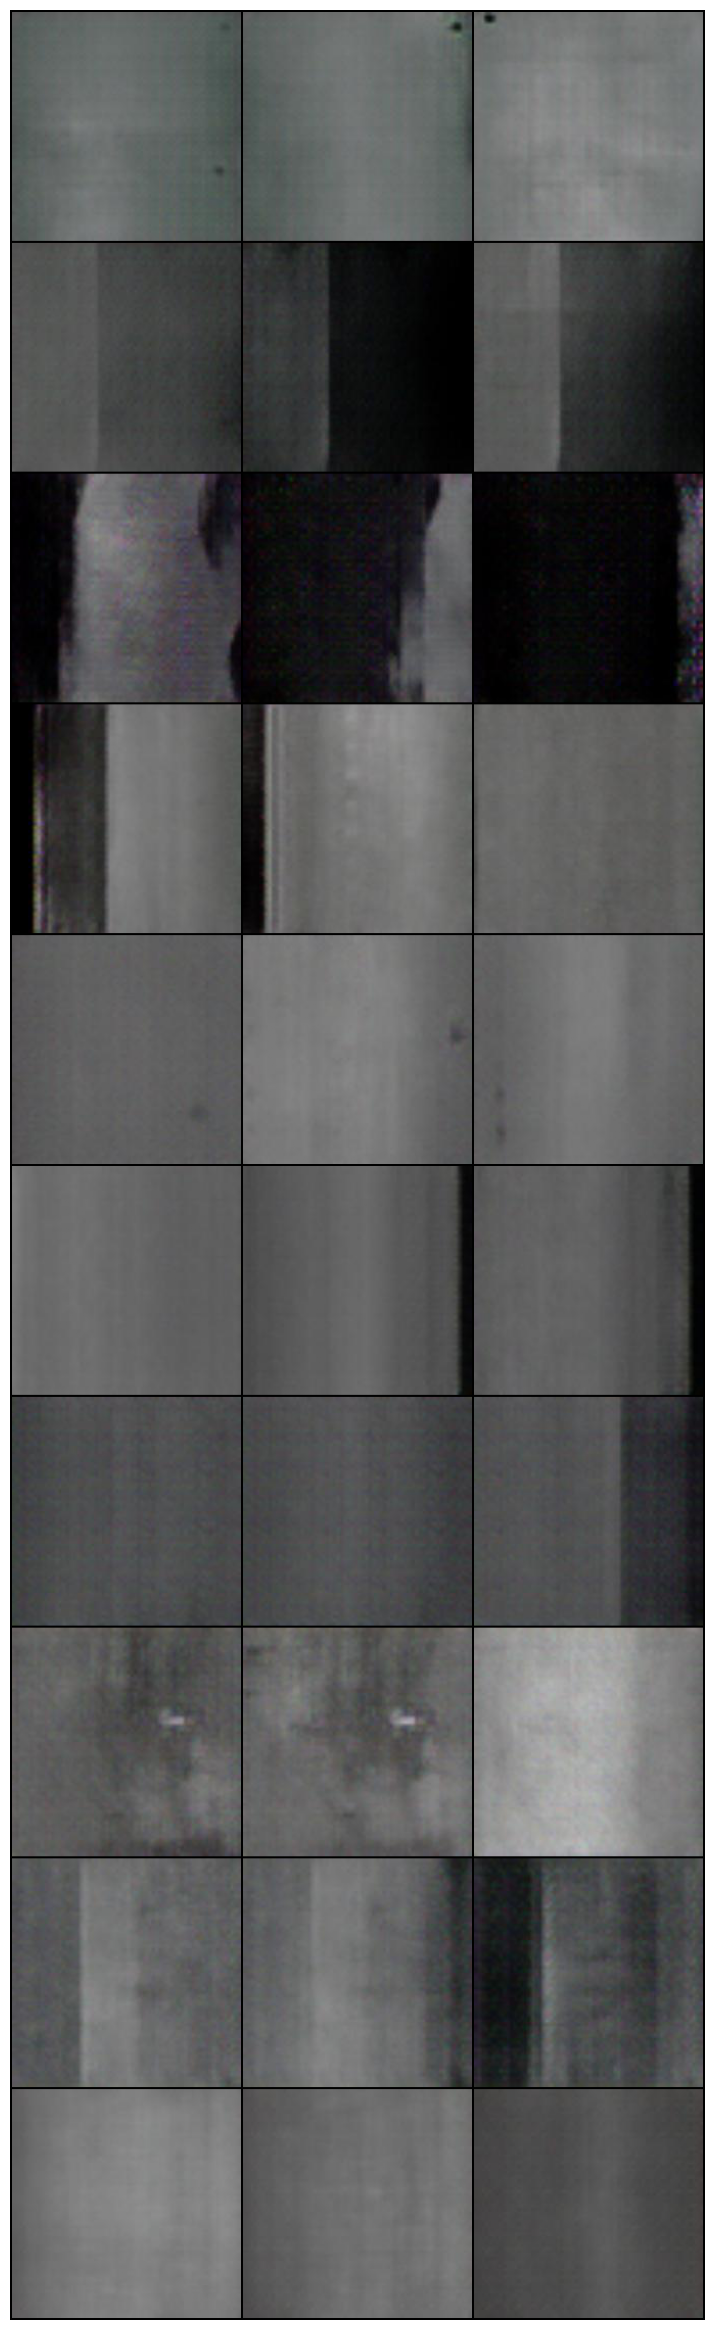

In [ ]:
# DCGAN Images
images_dcgan = select_images(dcgan)
plot_grid(images_dcgan)

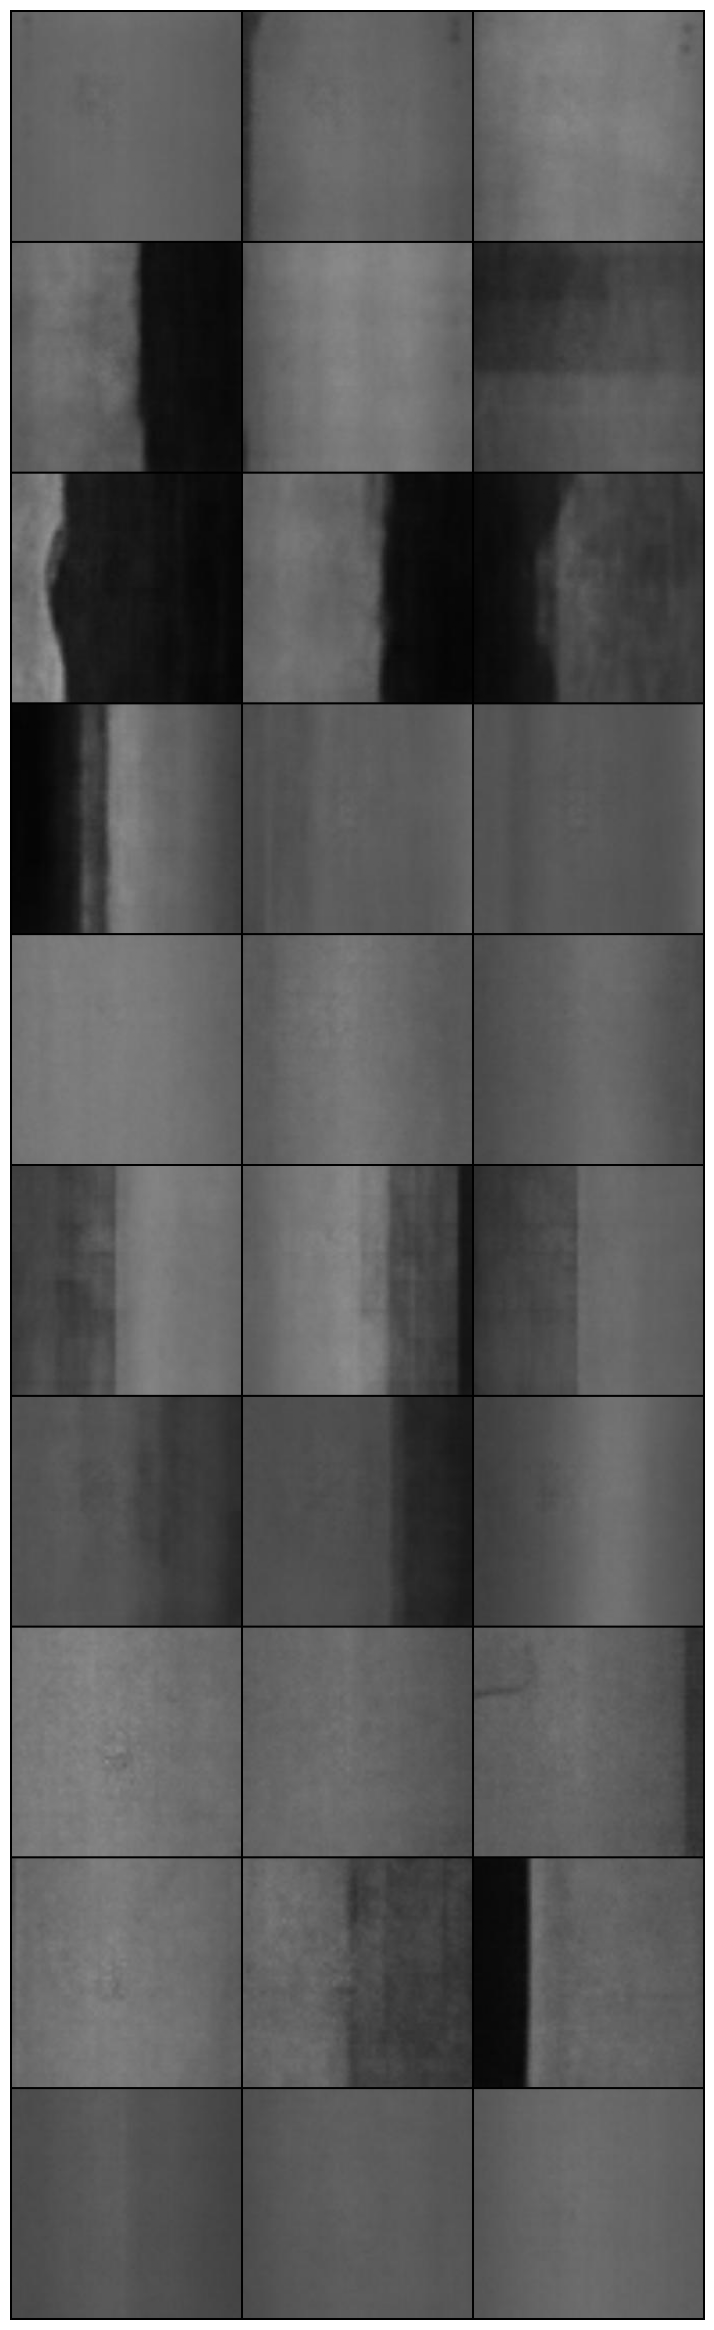

In [ ]:
# VAE Images
images_vae = select_images(vae)
plot_grid(images_vae)

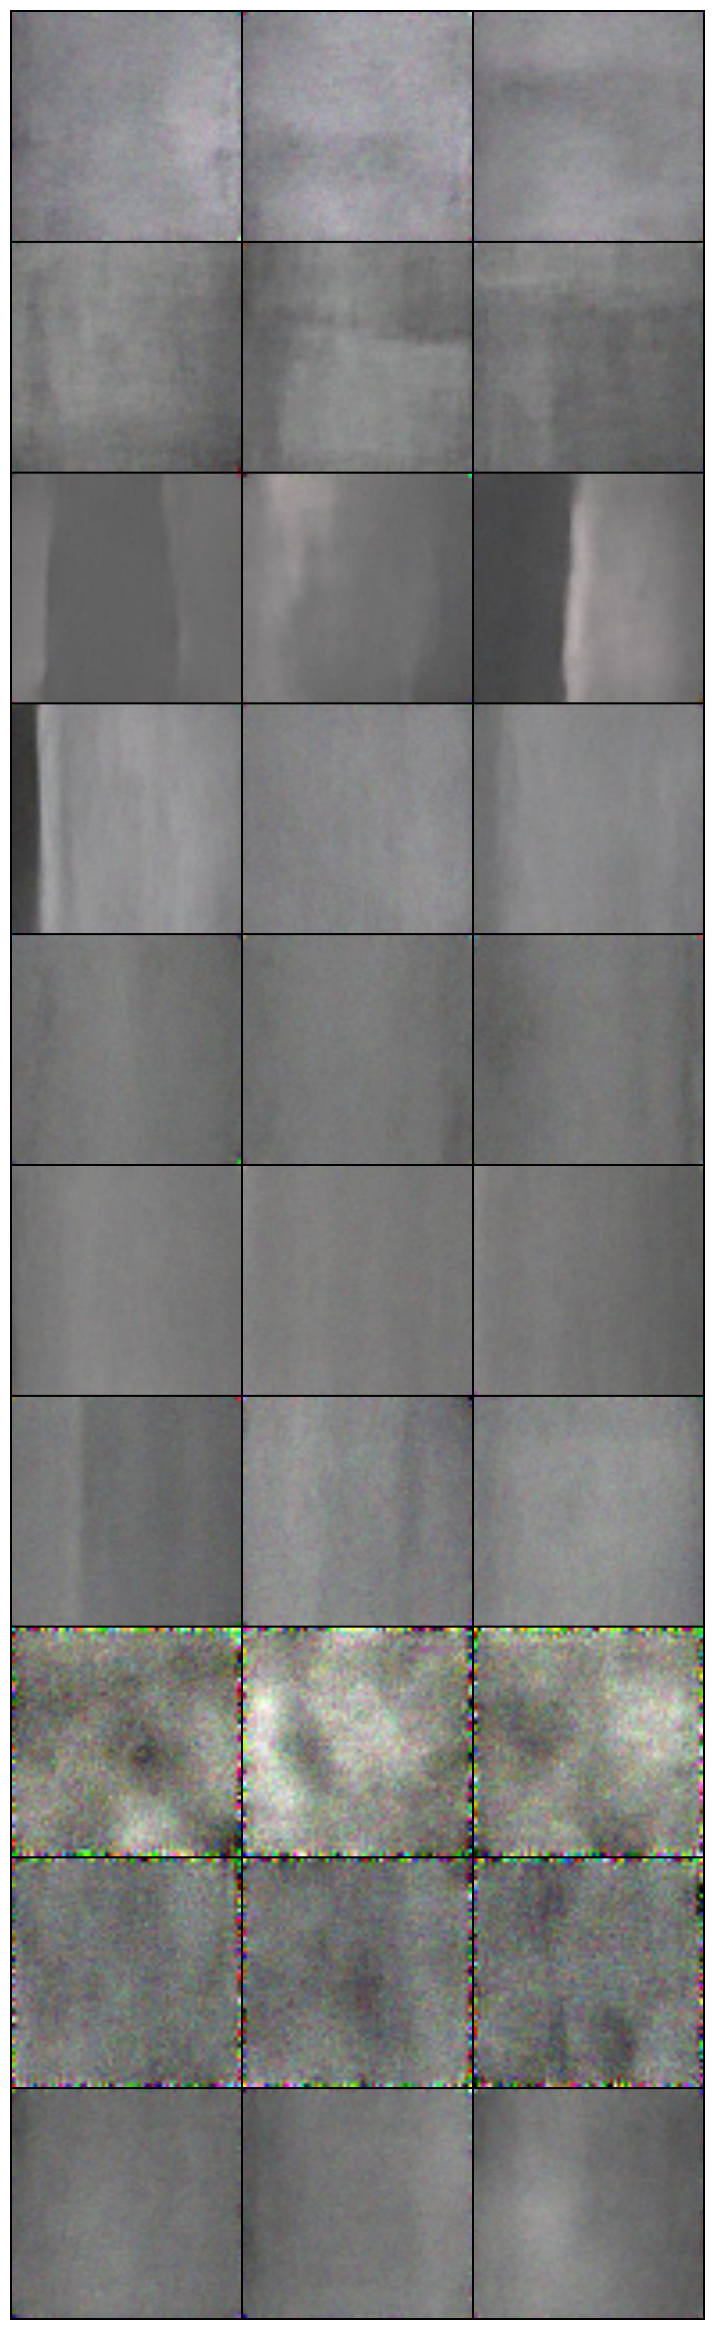

In [ ]:
# Unconditional DDPM Images
images_ddpm_uncond = select_images(ddpm_uncond)
plot_grid(images_ddpm_uncond)

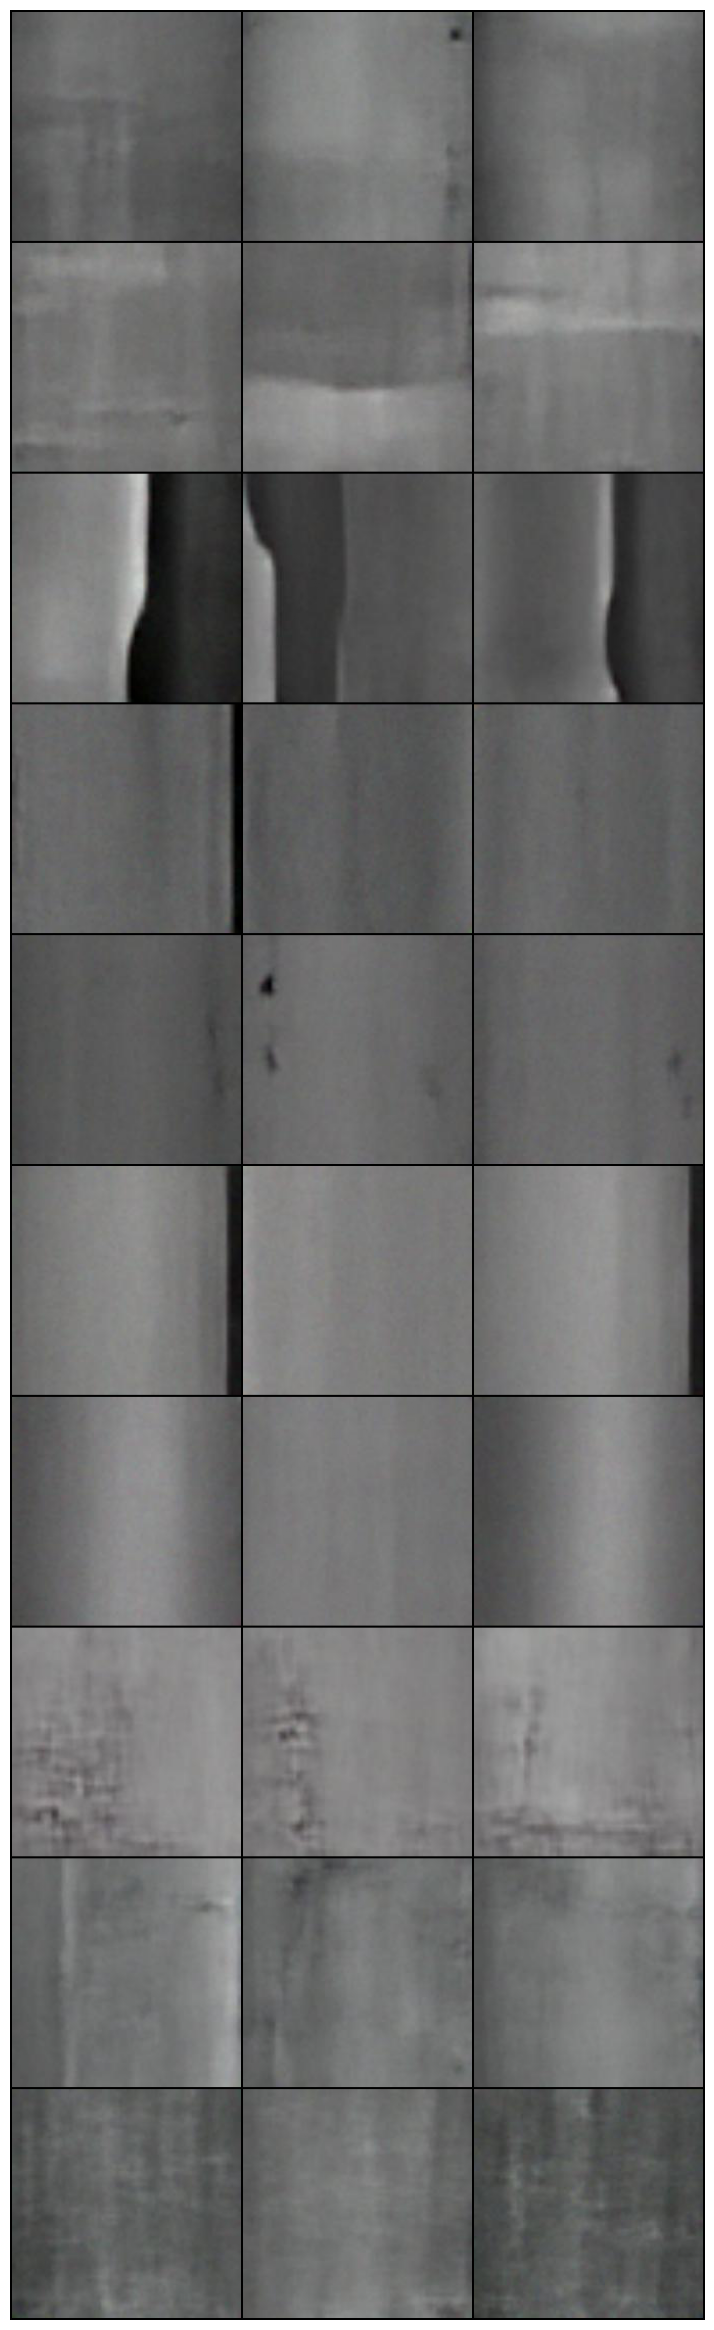

In [ ]:
# Conditional DDPM Images
images_ddpm_cond = select_images(ddpm_cond)
plot_grid(images_ddpm_cond)